<a href="https://colab.research.google.com/github/channacy/Forest-Cover-Classification/blob/main/CoverType_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout




In [44]:
data = pd.read_csv("sample_data/cover_data.csv")

In [45]:
print(data.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [46]:
print(data.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [47]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Given the various features including elevation, slope, aspect, predict the forest cover type. 

In [48]:
#features and labels

#features :
features = data.iloc[:, : -1]
print(features)
#labels:
#forest cover (numbers 1 - 7)
labels = data.iloc[:, -1]
#print(labels)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1        

In [49]:
#split the data into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.3, random_state = 30)

In [50]:
#scale numeric features in the dataset
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

#no need to encode labels into integer as they are already integers :)


In [60]:
#design the model
model = Sequential()
#input layer
model.add(InputLayer(input_shape = (X_train.shape[1],)))
#hidden layer
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation = 'relu'))

#output layer
model.add(Dense(8, activation = 'softmax'))




In [77]:
#optimizer 
#complie the model
opt = Adam(learning_rate = 0.1)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#train the model
stop = EarlyStopping(
  monitor = "val_loss",
  mode = "min",
  verbose = 1,
  patience = 40
)

history = model.fit(X_train, Y_train, epochs=50, batch_size=140, verbose=1, callbacks =[stop])

Epoch 1/50
2904/2906 [============================>.] - ETA: 0s - loss: 0.3672 - accuracy: 0.8524

2906/2906 [==============================] - 8s 3ms/step - loss: 0.3671 - accuracy: 0.8524
Epoch 2/50
2903/2906 [============================>.] - ETA: 0s - loss: 0.3664 - accuracy: 0.8530

2906/2906 [==============================] - 8s 3ms/step - loss: 0.3664 - accuracy: 0.8530
Epoch 3/50
2906/2906 [==============================] - ETA: 0s - loss: 0.3664 - accuracy: 0.8528

2906/2906 [==============================] - 7s 3ms/step - loss: 0.3664 - accuracy: 0.8528
Epoch 4/50
2905/2906 [============================>.] - ETA: 0s - loss: 0.3676 - accuracy: 0.8525

2906/2906 [==============================] - 7s 2ms/step - loss: 0.3676 - accuracy: 0.8525
Epoch 5/50
1353/2906 [============>.................] - ETA: 3s - loss: 0.3664 - accuracy: 0.8524

KeyboardInterrupt: ignored

In [67]:
y_estimate = model.predict(X_test)
y_estimate = np.argmax(y_estimate, axis = 1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(Y_test, y_estimate, target_names = class_names))

5447/5447 [==============================] - 5s 988us/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.94      0.82      0.88     63596
   Lodgepole Pine       0.85      0.96      0.90     85047
   Ponderosa Pine       0.90      0.76      0.82     10722
Cottonwood/Willow       0.96      0.52      0.67       823
            Aspen       0.71      0.58      0.63      2742
      Douglas-fir       0.68      0.69      0.69      5272
        Krummholz       0.94      0.84      0.88      6102

         accuracy                           0.88    174304
        macro avg       0.85      0.74      0.78    174304
     weighted avg       0.88      0.88      0.87    174304



In [68]:
loss, accuracy = model.evaluate(features, labels, verbose = 0)
print(loss)
print(accuracy)

27892.01171875
0.09212201833724976


KeyError: ignored

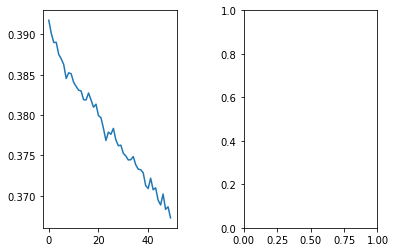

In [ ]:
from matplotlib import pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')